In [192]:
!wget http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat -P pretrained-model

--2019-05-23 16:26:44--  http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘pretrained-models/imagenet-vgg-verydeep-19.mat’

magenet-vgg-verydee   0%[                    ] 395.48K   137KB/s               ^C


In [189]:

import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from nst_utils import *
import numpy as np
import tensorflow as tf


model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")


#content image
# from IPython.display import Image, display

In [190]:
def compute_content_cost(a_C, a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    a_C_unrolled = tf.reshape(a_C ,[n_C,n_H*n_W])
    a_G_unrolled = tf.reshape(a_G,[n_C,n_H*n_W])    
    J_content = (tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled,a_G_unrolled))))/(4* n_H *n_W * n_C)
    return J_content

In [193]:
styleImage = "style11.jpg"
contentImage = "test.jpeg"

In [194]:
_ = Image.open(styleImage).resize((400,300))
_.save(styleImage)
_ = Image.open(contentImage).resize((400,300))
_.save(contentImage)

In [195]:
content_image =  scipy.misc.imread(contentImage)
style_image = scipy.misc.imread(styleImage)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [152]:
def gram_matrix(A):
    GA = tf.matmul(A, tf.transpose(A))
    return GA

In [153]:
def compute_layer_style_cost(a_S, a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    a_S = tf.reshape(a_S, [n_H*n_W, n_C])
    a_G = tf.reshape(a_G, [n_H*n_W, n_C])
    GS = gram_matrix(tf.transpose(a_S)) 
    GG = gram_matrix(tf.transpose(a_G))
    J_style_layer = tf.reduce_sum((GS - GG)**2) / (4 * n_C**2 * (n_W * n_H)**2)      
    return J_style_layer

In [154]:
def compute_style_cost(model, STYLE_LAYERS):
    J_style = 0
    for layer_name, coeff in STYLE_LAYERS:
        out = model[layer_name]
        a_S = sess.run(out)
        a_G = out
        J_style_layer = compute_layer_style_cost(a_S, a_G)
        J_style += coeff * J_style_layer
    return J_style

In [155]:
def total_cost(J_content , J_style , alpha = 10 , beta = 40):    
    J = alpha*J_content + beta*J_style
tf.reset_default_graph()

In [196]:
sess = tf.InteractiveSession()

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [157]:
def compute_content_cost(a_C, a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    a_C_unrolled = tf.transpose(tf.reshape(a_C, [-1]))
    a_G_unrolled = tf.transpose(tf.reshape(a_G, [-1]))
    J_content = tf.reduce_sum((a_C_unrolled - a_G_unrolled)**2) / (4 * n_H * n_W * n_C)
    return J_content

In [158]:
def gram_matrix(A):
    GA = tf.matmul(A, tf.transpose(A))    
    return GA

In [159]:
def compute_layer_style_cost(a_S, a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    a_S = tf.reshape(a_S, [n_H*n_W, n_C])
    a_G = tf.reshape(a_G, [n_H*n_W, n_C])
    GS = gram_matrix(tf.transpose(a_S)) #notice that the input of gram_matrix is A: matrix of shape (n_C, n_H*n_W)
    GG = gram_matrix(tf.transpose(a_G))
    J_style_layer = tf.reduce_sum((GS - GG)**2) / (4 * n_C**2 * (n_W * n_H)**2)
    return J_style_layer

In [160]:
STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]

In [161]:
def compute_style_cost(model, STYLE_LAYERS):
    J_style = 0
    for layer_name, coeff in STYLE_LAYERS:
        out = model[layer_name]
        a_S = sess.run(out)
        a_G = out
        J_style_layer = compute_layer_style_cost(a_S, a_G)
        J_style += coeff * J_style_layer
    return J_style

In [162]:
def total_cost(J_content, J_style, alpha = 10, beta = 40):
    J = alpha * J_content + beta * J_style    
    return J

In [197]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [198]:
content_image = reshape_and_normalize_image(content_image)

In [199]:
style_image = reshape_and_normalize_image(style_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


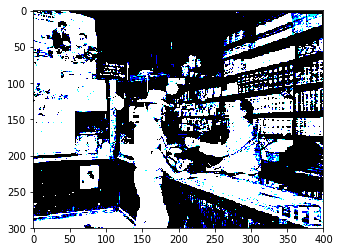

In [200]:
generated_image = generate_noise_image(content_image)
generated_image = content_image
imshow(generated_image[0])

In [167]:
style_image.shape

(1, 300, 400, 3)

In [201]:
model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")

In [202]:
sess.run(model['input'].assign(content_image))
out = model['conv4_2']
a_C = sess.run(out)
a_G = out
J_content = compute_content_cost(a_C, a_G)

In [203]:
sess.run(model['input'].assign(style_image))
J_style = compute_style_cost(model, STYLE_LAYERS)

In [204]:
 J = total_cost(J_content, J_style,  alpha = 10, beta = 40)

In [205]:
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(J)

In [206]:
def model_nn(sess, input_image, num_iterations = 200):
    sess.run(tf.global_variables_initializer())
    sess.run(model['input'].assign(input_image))
    for i in range(num_iterations):
        _ = sess.run(train_step)
        generated_image = sess.run(model['input'])
        if i%20 == 0:
            Jt, Jc, Js = sess.run([J, J_content, J_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
            save_image("output/" + str(i) + ".png", generated_image)
    save_image('output/generated_image.jpg', generated_image)
    
    return generated_image

In [207]:
model_nn(sess, generated_image)

Iteration 0 :
total cost = 2825536800.0
content cost = 1125.5472
style cost = 70638136.0
Iteration 20 :
total cost = 253975150.0
content cost = 11236.349
style cost = 6346569.5
Iteration 40 :
total cost = 101994190.0
content cost = 12463.221
style cost = 2546739.0
Iteration 60 :
total cost = 56397524.0
content cost = 12856.395
style cost = 1406724.0
Iteration 80 :
total cost = 38050990.0
content cost = 13136.882
style cost = 947990.6
Iteration 100 :
total cost = 28587960.0
content cost = 13370.168
style cost = 711356.44
Iteration 120 :
total cost = 22838984.0
content cost = 13577.218
style cost = 567580.3
Iteration 140 :
total cost = 18998614.0
content cost = 13757.937
style cost = 471525.84
Iteration 160 :
total cost = 16239362.0
content cost = 13918.989
style cost = 402504.3
Iteration 180 :
total cost = 14159618.0
content cost = 14060.373
style cost = 350475.34
Iteration 200 :
total cost = 12541042.0
content cost = 14189.296
style cost = 309978.72
Iteration 220 :
total cost = 1124543

KeyboardInterrupt: 